# Padova Emotional Dataset

[Padova Emotional Dataset Article](https://link.springer.com/article/10.3758/s13428-022-01914-4)

- **Objective**: To offer a rich dataset of both genuine (N = 707) and posed (N = 751) emotional expressions for the six universal emotions, using 56 participants.
- **Versions**: Available in original clips (with participants' body and background) and modified clips (focusing solely on the face).
- **Validation**: Original dataset validated by 122 human raters and the modified dataset by 280 human raters. Includes hit rates for emotion and genuineness, mean standard deviation of genuineness, and intensity perception for each clip.


## Dataset Creation
- **Participants**: 57 participants aged 20 to 30, with one withdrawing consent, resulting in contributions from 56 participants.
- **Experimental Setup**: Designed to record spontaneous emotions with minimal participant awareness of being filmed to preserve natural expressions.
- **Emotion Elicitation Procedure**: Utilized a multi-modal protocol with videos, games, and other tasks to elicit a range of emotions.

## Supplemental Materials

### T1
- **Identification Number**: Each subject is assigned a unique identifier.
- **Gender**: Marked as F (female) or M (male).
- **PEDFE Code**:
  - The first character indicates the subject's number.
  - The second character represents the emotion (d=disgust, h=happiness, f=fear, a=anger, s=surprise, t=sadness).
  - The third character denotes whether the emotion is genuine (g) or posed (s).
- **Hit Rate Accuracy Scores**: Percentage of raters correctly recognizing the emotion and its authenticity.
- **Intensity**: Rated on scales from 0-9.
- **Genuineness**: Rated on scales from -7 to +7.
- **Duration**: Length of each clip in seconds.

In [8]:
import pandas as pd

# Load Supplemental Material 1 (T1)
t1_desc_path = 'data/Supplemental_Material_T1.csv'
t1 = pd.read_csv(t1_desc_path)

# Display the first few rows of the dataset
print(t1.head(3))

   Subject Gender PEDFE_code     Type  Emotion  Hit rate Emotion (%)  \
0        1      F     1_dg_1  Genuine  Disgust                 78.79   
1        1      F     1_dg_2  Genuine  Disgust                 54.55   
2        1      F     1_dg_3  Genuine  Disgust                100.00   

   Hit rate Typo (%)  Mean_Genuineness  SD_Genuineness  Mean_Intensity  \
0              66.67              2.12            3.59            2.94   
1              95.45              3.00            1.92            3.52   
2              92.30              4.96            3.41            5.92   

   SD_Intensity  Duration(s)  
0          2.00        3.837  
1          2.09        5.472  
2          1.68        2.469  


### T2
- **Page 1: Emotion Hit Rate**
  - Details the average and standard deviation of hit rates for each actor in PEDFE, divided by emotion. This data provides insights into the accuracy of emotion recognition across the dataset.

- **Page 2: Genuineness Hit Rate**
   - Presents genuineness hit rates for each actor by emotion, including averages and standard deviations. This section highlights how well raters could distinguish between genuine and posed emotions.

### T3
- **Page 1: Emotion Experience**
   - Summarizes the emotions participants reported experiencing for each task, offering a direct view into the emotional impact of the elicitation protocol.

- **Page 2: Levels of Genuineness**
   - Features ratings from participants on the genuineness of their emotions for each task, ranging from completely not genuine to completely genuine. This self-assessment provides a unique perspective on the authenticity of the expressed emotions.

- **Page 3: Intensity Ratings**
   - Contains participants' self-rated intensity for each task, on a scale from 0 (none) to 9 (strong). These ratings offer a quantifiable measure of the emotional strength participants felt during each task.


# Py-Feat Tool Box
https://py-feat.org/pages/intro.html

## Initialize a Detector
- Class that is a combination of a Face, Landmark, Action Unit, and Emotion detection model into a single object<br>
- Available models: https://py-feat.org/pages/models.html

In [5]:
from feat import Detector

detector = Detector(
    face_model="retinaface",
    landmark_model="mobilefacenet",
    au_model='xgb',
    emotion_model="resmasknet",
    facepose_model="img2pose",
    device='cuda' #Use GPU Acceleration
)

### Video Recognition

#### Detector
- `face_model="retinaface"`: Specifies the use of the RetinaFace model for face detection. RetinaFace is known for its accuracy in detecting faces across various orientations and scales.

- `landmark_model="mobilefacenet"`: Chooses MobileFaceNet as the model for detecting facial landmarks. MobileFaceNet is efficient and designed for mobile and embedded vision applications, balancing accuracy and computational resource use.

- `au_model='xgb'`: Utilizes an XGBoost (Extreme Gradient Boosting) model for recognizing facial action units. Action units are fundamental components of facial expressions, corresponding to contractions of specific facial muscles.

- `emotion_model="resmasknet"`: Employs the ResMaskNet model for emotion detection. This model is capable of classifying various emotional states by analyzing facial features and expressions.

- `facepose_model="img2pose"`: Uses the img2pose model to estimate the pose of the face. This includes the orientation of the face in terms of pitch, yaw, and roll angles, providing context for the facial expressions in relation to the camera perspective.

- `device='cuda'`: Specifies that the GPU should be used for computation, leveraging CUDA for acceleration. 


In [73]:
from feat import Detector
detector = Detector(
    face_model="retinaface",
    landmark_model="mobilefacenet",
    au_model='xgb',
    emotion_model="resmasknet",
    facepose_model="img2pose",
    device='cuda' #Use GPU Acceleration
)

#### Processing Videos
 - https://py-feat.org/basic_tutorials/03_detector_vids.html

In [72]:
# Function that display a video given path
from IPython.core.display import Video
def play_video(video_path):
    return Video(video_path, embed=True)
video_directory = 'data/PEDFE_set_clips/'
play_video(video_directory + "1_dg_1.avi")

In [9]:
# Function to process a single video and extract features
def process_video(video_path):
    try:
        # Use detector to process the video
        result = detector.detect_video(video_path, skip_frames=10, aggregate=True)
        return result
    except Exception as e:
        print(f"Error processing {video_path}: {e}")
        return None

In [58]:
video_prediction = detector.detect_video(video_directory + "1_dg_1.avi", skip_frames=24)
video_prediction.head()

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:03<00:00,  1.25it/s]


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame,approx_time
frame,,,,,,,,,,,,,,,,,,,,,
0,361.520721,146.870797,123.084714,160.190791,0.996511,357.018351,357.702730,360.491409,364.937673,372.436422,...,0.017644,0.388444,0.002080,0.001345,0.532609,0.000289,0.057588,data/PEDFE_set_clips/1_dg_1.avi,0,00:00
24,364.611656,146.526570,119.613393,161.806055,0.994640,356.203173,357.017061,359.896259,364.217857,371.551642,...,0.004591,0.932962,0.000725,0.001484,0.053524,0.000119,0.006596,data/PEDFE_set_clips/1_dg_1.avi,24,00:00
48,362.733533,147.089691,119.942849,159.486701,0.996052,356.571152,357.294930,360.045211,364.382502,371.884518,...,0.003074,0.987781,0.000149,0.001097,0.005102,0.000068,0.002730,data/PEDFE_set_clips/1_dg_1.avi,48,00:01
72,362.703624,145.513767,120.921401,162.536608,0.996426,356.421769,357.232449,360.068641,364.545906,372.109275,...,0.024373,0.731282,0.002652,0.002555,0.182910,0.000729,0.055498,data/PEDFE_set_clips/1_dg_1.avi,72,00:02
96,360.490243,145.832482,123.115849,160.026589,0.997027,356.897952,357.639360,360.366895,364.694505,372.022227,...,0.030284,0.098492,0.002152,0.000909,0.771384,0.000528,0.096250,data/PEDFE_set_clips/1_dg_1.avi,96,00:03


#### Emotion Prediction

[<Figure size 1500x700 with 3 Axes>, <Figure size 1500x700 with 3 Axes>]

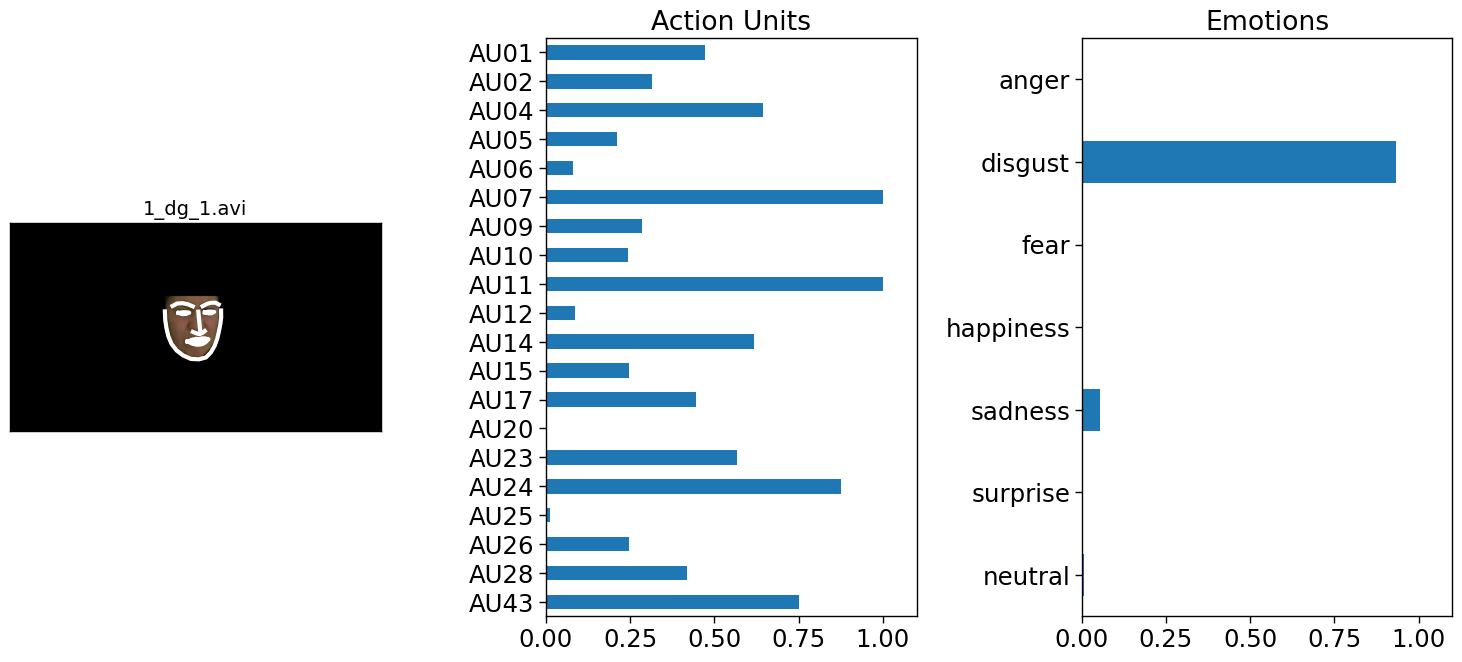

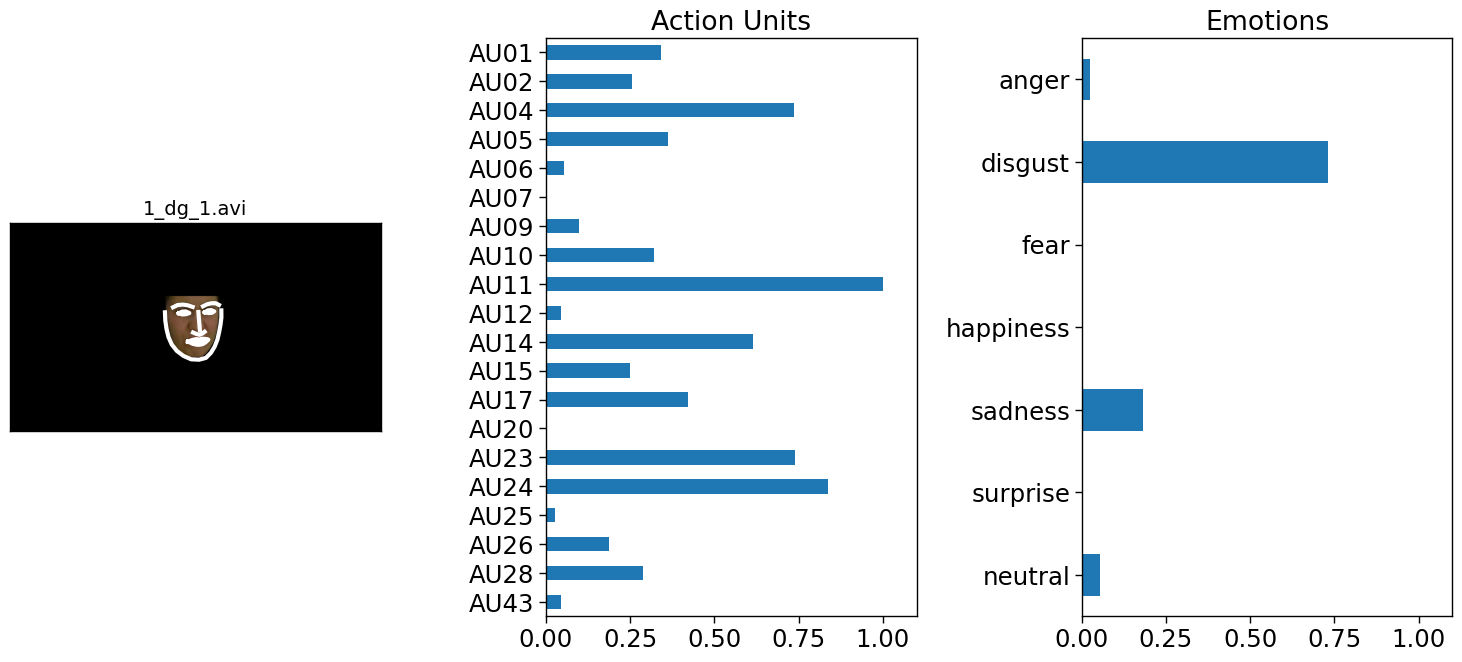

In [79]:
video_prediction.loc[[24, 72]].plot_detections(faceboxes=False, add_titles=True)

#### Emotion Development

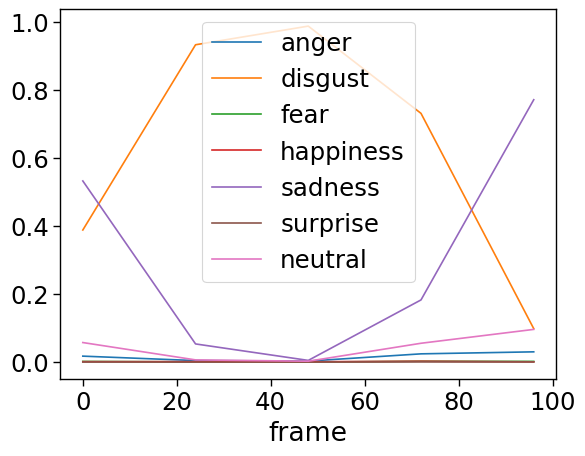

In [77]:
axes = video_prediction.emotions.plot()